<a href="https://colab.research.google.com/github/atakanksha/data255_hw2/blob/main/Akanksha_Tyagi_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from google.colab import drive

torch.manual_seed(42)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Load the QMNIST Dataset

In [ ]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='/content/drive/MyDrive/', what='train', download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='/content/drive/MyDrive/', what='test', download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Iterating and Visualizing the Dataset

### Train dataset

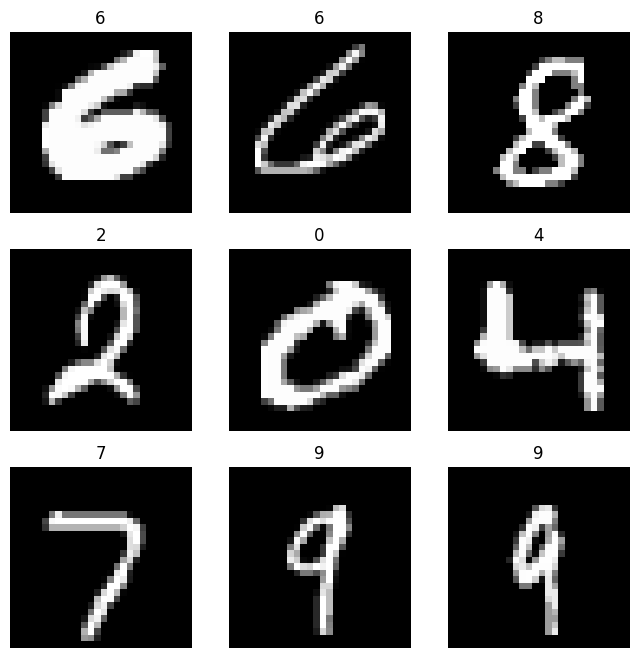

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f'{label}')
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Test dataset

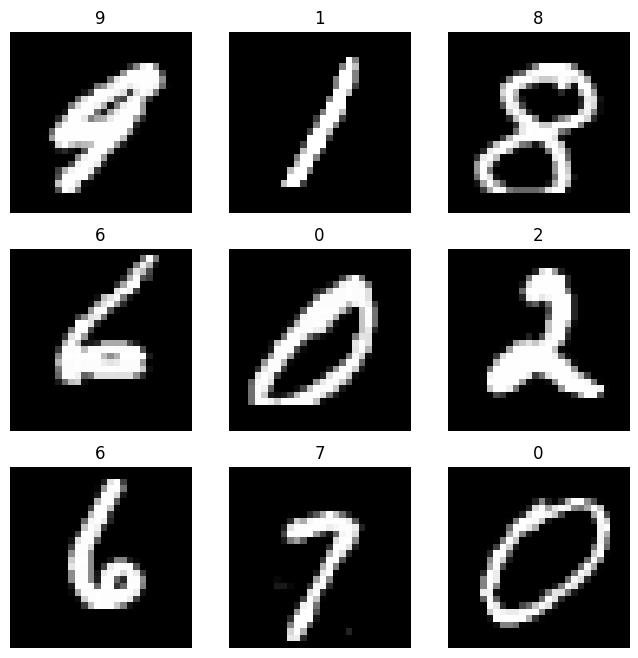

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f'{label}')
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Step 2: Reproduce the results

In [ ]:
def train_model(model, criterion, optimizer, num_epochs=5):
  '''This function defines the training loop for the model.
  '''
  model.train()
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          inputs, labels = data
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
          if i % 400 == 399:  # print every 100 mini-batches
              print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
              running_loss = 0.0
  print('Finished Training')

def evaluate_model(model, data_loader):
  '''This function computes accuracy of the model.
  '''
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for data in data_loader:
      images, labels = data
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  acc = correct / total
  return acc

## Experiment with the model define in the Demo 2.

### Step 3. Report on the results in terms of prediction accuracy on the train and test datasets



In [ ]:
# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define loss.
criterion = nn.CrossEntropyLoss()

# Define Optimizer.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model.
train_model(model, criterion, optimizer)

# Evaluate the model

train_acc = evaluate_model(model, train_loader)
test_acc = evaluate_model(model, test_loader)

print(f'Accuracy on train set: {train_acc * 100: .4f} %')
print(f'Accuracy on test set: {test_acc * 100: .4f} %')

Epoch 1, Batch 400, Loss: 2.1459623269736765
Epoch 1, Batch 800, Loss: 1.2208998386561871
Epoch 2, Batch 400, Loss: 0.8451255278661847
Epoch 2, Batch 800, Loss: 0.7214867077022791
Epoch 3, Batch 400, Loss: 0.5837062974460423
Epoch 3, Batch 800, Loss: 0.5367427599802613
Epoch 4, Batch 400, Loss: 0.45442423280328514
Epoch 4, Batch 800, Loss: 0.4366771930269897
Epoch 5, Batch 400, Loss: 0.36431271432433276
Epoch 5, Batch 800, Loss: 0.39914529111236335
Finished Training
Accuracy on train set:  97.5733 %
Accuracy on test set:  96.5217 %


We see that the model achieves accuracies of 97.5733 % and  96.5217 % on the train and test dataset respectively.

## Step 4. Choose one of the proposed modifications below:

* Add another Dense layer of 128 nodes
* Increase the current number of nodes in the layer to 256

We Experiment by increasing the number of nodes to 256.

**Hypothesis**

We expect this model to achieve higher training and test accuracy since we have increased the representation power of the model. The model with more number of nodes can fit the data better and provide higher accuracy.

### Step 5. Modify the model based on the chosen method and train

### Step 6. Report on the results of the modified model and if it matches your hypothesis

In [ ]:
# Define the neural network architecture by changing 64 to 256 in the second layer of the MLP.
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define loss.
criterion = nn.CrossEntropyLoss()

# Define Optimizer.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model.
train_model(model, criterion, optimizer)

# Evaluate the model

train_acc = evaluate_model(model, train_loader)
test_acc = evaluate_model(model, test_loader)

print(f'Accuracy on train set: {train_acc * 100: .4f} %')
print(f'Accuracy on test set: {test_acc * 100: .4f} %')

Epoch 1, Batch 400, Loss: 1.9549043940007687
Epoch 1, Batch 800, Loss: 1.0004923907667398
Epoch 2, Batch 400, Loss: 0.7096805231273174
Epoch 2, Batch 800, Loss: 0.5982323435880244
Epoch 3, Batch 400, Loss: 0.47732176636811346
Epoch 3, Batch 800, Loss: 0.4804699730407447
Epoch 4, Batch 400, Loss: 0.3927404114883393
Epoch 4, Batch 800, Loss: 0.3778555641323328
Epoch 5, Batch 400, Loss: 0.2938618812360801
Epoch 5, Batch 800, Loss: 0.3592703535943292
Finished Training
Accuracy on train set:  98.2950 %
Accuracy on test set:  97.1283 %


We see that the model achieves higher accuracies of 98.2950 % and  97.1283 % on the train and test dataset respectively. This matches with our hypothesis.

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [ ]:
# Define a deeper neural network architecture by adding two more layers with 512 and 1024 nodes each.
# The model is trained for 10 epochs.
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the neural network
model = MLP()

# Define loss.
criterion = nn.CrossEntropyLoss()

# Define Optimizer.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model.
train_model(model, criterion, optimizer, num_epochs=10)

# Evaluate the model

train_acc = evaluate_model(model, train_loader)
test_acc = evaluate_model(model, test_loader)

print(f'Accuracy on train set: {train_acc * 100: .4f} %')
print(f'Accuracy on test set: {test_acc * 100: .4f} %')

Epoch 1, Batch 400, Loss: 1.8405516554415227
Epoch 1, Batch 800, Loss: 0.9826615327596664
Epoch 2, Batch 400, Loss: 0.6977258816175163
Epoch 2, Batch 800, Loss: 0.637262009382248
Epoch 3, Batch 400, Loss: 0.5411484399344773
Epoch 3, Batch 800, Loss: 0.4930194294452667
Epoch 4, Batch 400, Loss: 0.43731711409054697
Epoch 4, Batch 800, Loss: 0.43246525890659543
Epoch 5, Batch 400, Loss: 0.37815760446712376
Epoch 5, Batch 800, Loss: 0.39121827051974833
Epoch 6, Batch 400, Loss: 0.32936835204949605
Epoch 6, Batch 800, Loss: 0.35400074751116334
Epoch 7, Batch 400, Loss: 0.288955679560313
Epoch 7, Batch 800, Loss: 0.31819772159215065
Epoch 8, Batch 400, Loss: 0.2551920562214218
Epoch 8, Batch 800, Loss: 0.28005859403288924
Epoch 9, Batch 400, Loss: 0.2432189454010222
Epoch 9, Batch 800, Loss: 0.26570332966861315
Epoch 10, Batch 400, Loss: 0.22355888562335166
Epoch 10, Batch 800, Loss: 0.24333055207855067
Finished Training
Accuracy on train set:  98.8167 %
Accuracy on test set:  97.2283 %


This model achieces an accuracy 98.8167 % and 97.2283 % on the training and the test set respectively.

In [ ]:
# Define a deeper neural network architecture by adding two more layers with 512 and 1024 nodes each.
# We use GeLU activation.
# The model is trained for 10 epochs.

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.nn.functional.gelu(self.fc1(x))
        x = torch.nn.functional.gelu(self.fc2(x))
        x = torch.nn.functional.gelu(self.fc3(x))
        x = torch.nn.functional.gelu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the neural network
model = MLP()

# Define loss.
criterion = nn.CrossEntropyLoss()

# Define Optimizer.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model.
train_model(model, criterion, optimizer, num_epochs=10)

# Evaluate the model

train_acc = evaluate_model(model, train_loader)
test_acc = evaluate_model(model, test_loader)

print(f'Accuracy on train set: {train_acc * 100: .4f} %')
print(f'Accuracy on test set: {test_acc * 100: .4f} %')

Epoch 1, Batch 400, Loss: 1.7236847053468227
Epoch 1, Batch 800, Loss: 0.8801373230293393
Epoch 2, Batch 400, Loss: 0.6380469822045416
Epoch 2, Batch 800, Loss: 0.5437593651609496
Epoch 3, Batch 400, Loss: 0.49124817331321535
Epoch 3, Batch 800, Loss: 0.4819175181630999
Epoch 4, Batch 400, Loss: 0.41377425047103317
Epoch 4, Batch 800, Loss: 0.38355579345719887
Epoch 5, Batch 400, Loss: 0.3368227437697351
Epoch 5, Batch 800, Loss: 0.3645792839024216
Epoch 6, Batch 400, Loss: 0.29208838506834583
Epoch 6, Batch 800, Loss: 0.32520084470277655
Epoch 7, Batch 400, Loss: 0.25935241127968767
Epoch 7, Batch 800, Loss: 0.2831889081595
Epoch 8, Batch 400, Loss: 0.23411344609688967
Epoch 8, Batch 800, Loss: 0.26197830299614
Epoch 9, Batch 400, Loss: 0.21973510462674312
Epoch 9, Batch 800, Loss: 0.22086135570338228
Epoch 10, Batch 400, Loss: 0.18534137311362428
Epoch 10, Batch 800, Loss: 0.204657151705469
Finished Training
Accuracy on train set:  98.8350 %
Accuracy on test set:  97.2217 %


This model achieves an accuracy of 98.8350 % and 97.2217 % on the training and the test set respectively.


In [ ]:
# Define a deeper neural network architecture by adding two more layers with 512 and 1024 nodes each.
# The activation is ReLU.
# The number of epochs is 10.
# We add a dropout of 0.2 before the last layer.

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.drop = nn.Dropout(0.2)
        self.fc5 = nn.Linear(1024, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.drop(x)
        x = self.fc5(x)
        return x

# Initialize the neural network
model = MLP()

# Define loss.
criterion = nn.CrossEntropyLoss()

# Define Optimizer.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model.
train_model(model, criterion, optimizer, num_epochs=10)

# Evaluate the model

train_acc = evaluate_model(model, train_loader)
test_acc = evaluate_model(model, test_loader)

print(f'Accuracy on train set: {train_acc * 100: .4f} %')
print(f'Accuracy on test set: {test_acc * 100: .4f} %')

Epoch 1, Batch 400, Loss: 1.893229205161333
Epoch 1, Batch 800, Loss: 0.9447060820646584
Epoch 2, Batch 400, Loss: 0.6719955756887793
Epoch 2, Batch 800, Loss: 0.6639543267246336
Epoch 3, Batch 400, Loss: 0.5126140347588808
Epoch 3, Batch 800, Loss: 0.5234306015027687
Epoch 4, Batch 400, Loss: 0.4300039954064414
Epoch 4, Batch 800, Loss: 0.4564289352763444
Epoch 5, Batch 400, Loss: 0.36644879340194164
Epoch 5, Batch 800, Loss: 0.39684921093285086
Epoch 6, Batch 400, Loss: 0.3573653885978274
Epoch 6, Batch 800, Loss: 0.3613575974223204
Epoch 7, Batch 400, Loss: 0.29805357260629534
Epoch 7, Batch 800, Loss: 0.31668081143172455
Epoch 8, Batch 400, Loss: 0.2873810807452537
Epoch 8, Batch 800, Loss: 0.2601408490451286
Epoch 9, Batch 400, Loss: 0.217548885489814
Epoch 9, Batch 800, Loss: 0.28433641798677856
Epoch 10, Batch 400, Loss: 0.2531428709859028
Epoch 10, Batch 800, Loss: 0.2511446058584261
Finished Training
Accuracy on train set:  98.6400 %
Accuracy on test set:  97.0650 %


This model achieves an accuracy of 98.6400 % and 97.0650 % on the training and the test set respectively.

In [ ]:
# Define a deeper neural network architecture by adding two more layers with 512 and 1024 nodes each.
# We add a dropout of 0.2.
# We use AdamW optimizer.
# We also add a weight decay of 0.001.
# The model is trained for 20 epochs.

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.drop = nn.Dropout(0.2)
        self.fc5 = nn.Linear(1024, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.drop(x)
        x = self.fc5(x)
        return x

# Initialize the neural network
model = MLP()

# Define loss.
criterion = nn.CrossEntropyLoss()

# Define Optimizer.
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Train the model.
train_model(model, criterion, optimizer, num_epochs=20)

# Evaluate the model

train_acc = evaluate_model(model, train_loader)
test_acc = evaluate_model(model, test_loader)

print(f'Accuracy on train set: {train_acc * 100: .4f} %')
print(f'Accuracy on test set: {test_acc * 100: .4f} %')

Epoch 1, Batch 400, Loss: 1.8936161860078573
Epoch 1, Batch 800, Loss: 0.9204265080392361
Epoch 2, Batch 400, Loss: 0.6705955609679222
Epoch 2, Batch 800, Loss: 0.6611327098216861
Epoch 3, Batch 400, Loss: 0.5528772113844752
Epoch 3, Batch 800, Loss: 0.4791449089022353
Epoch 4, Batch 400, Loss: 0.4309293461916968
Epoch 4, Batch 800, Loss: 0.45173622245900336
Epoch 5, Batch 400, Loss: 0.3715414598211646
Epoch 5, Batch 800, Loss: 0.41371443985495715
Epoch 6, Batch 400, Loss: 0.3390394068346359
Epoch 6, Batch 800, Loss: 0.380928326935973
Epoch 7, Batch 400, Loss: 0.3014873561402783
Epoch 7, Batch 800, Loss: 0.3385606812860351
Epoch 8, Batch 400, Loss: 0.30735907432739623
Epoch 8, Batch 800, Loss: 0.3030838787625544
Epoch 9, Batch 400, Loss: 0.2557721503870562
Epoch 9, Batch 800, Loss: 0.2932206219504587
Epoch 10, Batch 400, Loss: 0.23991551847517256
Epoch 10, Batch 800, Loss: 0.27098743282840587
Epoch 11, Batch 400, Loss: 0.2187682779302122
Epoch 11, Batch 800, Loss: 0.24628897935850547
E

This model achieves an accuracy of 99.0517 % and 97.2950 % on the training and the test set respectively.

In conclusion, this model is the best model out of all the model that we trained.

### Show results on one test image

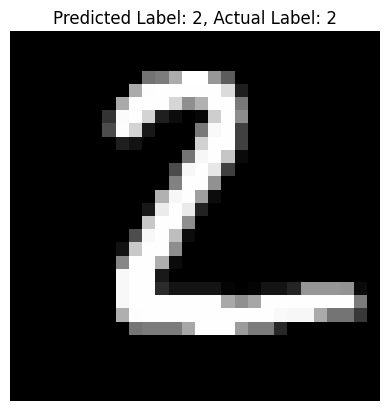

In [ ]:
# Get one test image and its label
images, labels = next(iter(test_loader))
image, label = images[1], labels[1]
outputs = model(image)
_, predicted = torch.max(outputs.data, 1)

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted.item()}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()
